In [4]:
import numpy as np
import cv2

#change to your video path
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if (ret!=True):
         break
            
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)
    
    
    lower_blue = np.array([38, 86, 0])
    upper_blue = np.array([121, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    for contour in contours:
        cv2.drawContours(frame, contour, -1, (0, 255, 0), 3)

    # Display the resulting frame
    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

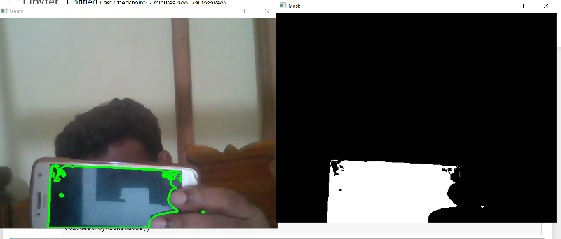